In [0]:
# 因為圖片實在太多，所以要用壓縮檔載入

import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/train_images.zip")
f.extractall("./datasets")

In [0]:
# 圖片都混在一起了，分類一下

import os
import pandas as pd
from glob import glob

# 取得檔案路徑
imagePaths = glob('/content/datasets/train_images/*')

# 取得分類答案
imageAns = pd.read_csv("./drive/My Drive/AOI/train.csv")

# 創新資料夾
for class_num in range(6):
  DATASET_PATH = '/content/train_images/'
  class_folders = DATASET_PATH + str(class_num)

  # exist_ok：只有在目录不存在时创建目录，目录已存在时不会抛出异常。
  os.makedirs(class_folders, exist_ok=True)

In [0]:
# 移動檔案

import shutil

for class_num in range(6):
  class00 = imageAns[imageAns["Label"] == class_num]
  class_list = class00["ID"]
  # print(class_list)

  for c in class_list:
    shutil.move('/content/datasets/train_images/' + str(c), 
                '/content/train_images/' + str(class_num) + "/" + str(c))

In [0]:
# 創造 圖片被預處理後要存檔的位置

for class_num in range(6):
  # 創造資料夾
  os.makedirs("/content/train_nped/" + str(class_num), exist_ok=True)

In [5]:
# 函數設計 - 測試區

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

img = load_img("/content/train_images/0/train_00000.png")
img_npm = np.array(img)
img_pre = preprocess_input(img_npm)
K = np.array(img_pre)

import cv2
# VGG_MEAN = [103.939, 116.779, 123.68]
img_VGGed = K / 123.68
cv2.imwrite('/content/train_nped/0/train_00000.png', img_VGGed)

True

In [0]:
# 改寫成函數
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

def img_VGG16_preprocess_input (Paths):
  img = load_img(Paths)
  img_npm = np.array(img)
  img_pre = preprocess_input(img_npm)
  K = np.array(img_pre)
  return K

def image_nped_saved (K, Paths):
  # VGG_MEAN = [103.939, 116.779, 123.68]
  
  img_VGGed = K / 255  # 直接除255單純
  cv2.imwrite(Paths, img_VGGed)

In [0]:
# 準備 把 預處理好的檔案 除 /225 後 存成圖片檔。
# 這樣才能跑Generator

# 我解決不了它，所以我決定複製6遍。

for Paths in glob('/content/train_images/0/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/train_nped/" + A[-2] + "/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

for Paths in glob('/content/train_images/1/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/train_nped/" + A[-2] + "/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

for Paths in glob('/content/train_images/2/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/train_nped/" + A[-2] + "/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

for Paths in glob('/content/train_images/3/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/train_nped/" + A[-2] + "/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

for Paths in glob('/content/train_images/4/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/train_nped/" + A[-2] + "/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

for Paths in glob('/content/train_images/5/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/train_nped/" + A[-2] + "/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

In [0]:
# Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
Trained_Generator = ImageDataGenerator(rescale= 1. * 255)

In [9]:
Trained_Generator_AddFlow = Trained_Generator.flow_from_directory("/content/train_nped/",
                                                                  target_size = (256, 256),
                                                                  batch_size = 50,
                                                                  class_mode ='categorical')

Found 2528 images belonging to 6 classes.


In [0]:
# cnn = VGG16

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, GlobalAveragePooling2D

cnn = VGG16(include_top=False, input_shape=(256, 256, 3))

for l in cnn.layers:
    l.trainable = True

x = BatchNormalization()(cnn.output)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(64, activation="relu")(x)
out = Dense(6, activation="softmax")(x)

model = Model(inputs=cnn.input, outputs=out)
# model.summary()

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [12]:
# 感謝上帝，這裡是模型。
model.fit(Trained_Generator_AddFlow, epochs= 10, verbose= 1)

Epoch 1/10
51/51 [==============================] - 94s 2s/step - loss: 1.1120 - categorical_accuracy: 0.6222
Epoch 2/10
51/51 [==============================] - 86s 2s/step - loss: 0.7860 - categorical_accuracy: 0.7302
Epoch 3/10
51/51 [==============================] - 86s 2s/step - loss: 0.7364 - categorical_accuracy: 0.7567
Epoch 4/10
51/51 [==============================] - 86s 2s/step - loss: 0.7915 - categorical_accuracy: 0.7385
Epoch 5/10
51/51 [==============================] - 86s 2s/step - loss: 0.6463 - categorical_accuracy: 0.7844
Epoch 6/10
51/51 [==============================] - 86s 2s/step - loss: 0.6599 - categorical_accuracy: 0.7785
Epoch 7/10
51/51 [==============================] - 86s 2s/step - loss: 0.5977 - categorical_accuracy: 0.8070
Epoch 8/10
51/51 [==============================] - 86s 2s/step - loss: 0.5640 - categorical_accuracy: 0.8180
Epoch 9/10
51/51 [==============================] - 86s 2s/step - loss: 0.5665 - categorical_accuracy: 0.8149
Epoch 10/1

In [13]:
# 看準確率

loss, accu = model.evaluate(Trained_Generator_AddFlow)
print('準確率:', accu)

51/51 [==============================] - 25s 492ms/step - loss: 0.6477 - categorical_accuracy: 0.7923
準確率: 0.7923259735107422


In [0]:
# 載入 真．驗證資料

import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/test_images.zip")
f.extractall("./datasets_test/")

In [0]:
# 創造 Test 資料夾
os.makedirs("/content/test_nped/test/", exist_ok=True)

In [0]:
# 驗證資料預處理

for Paths in glob('/content/datasets_test/test_images/*'):
  # 產生新的地址
  A = Paths.split("/")
  A = "/content/test_nped/test/" + A[-1]

  # 用上面的自定義函數預處理檔案
  preprocessed = img_VGG16_preprocess_input(Paths)
  image_nped_saved(preprocessed, A)

In [17]:
GeneratorFlowed_Test = Trained_Generator.flow_from_directory("/content/test_nped/",
                                                             target_size= (256, 256),
                                                             batch_size= 50,
                                                             class_mode= 'categorical')

Found 10142 images belonging to 1 classes.


In [18]:
pred = model.predict(GeneratorFlowed_Test, verbose=1)

203/203 [==============================] - 106s 520ms/step


In [19]:
# 預言出來了

import numpy as np

predicted_classed = np.argmax(pred, axis=1)
predicted_classed

array([1, 4, 0, ..., 0, 0, 0])

In [0]:
import pandas as pd

df2 = pd.read_csv("./drive/My Drive/AOI/test.csv")
df2 = df2.drop(["Label"], axis=1)

df9 = pd.DataFrame({"Label":predicted_classed})

# 預言文件
result = pd.concat([df2, df9], axis=1) 
# result

In [0]:
# 存檔 上傳Aidea 拿成績
result.to_csv("/content/drive/My Drive/Result.csv", encoding="UTF8", index=False)

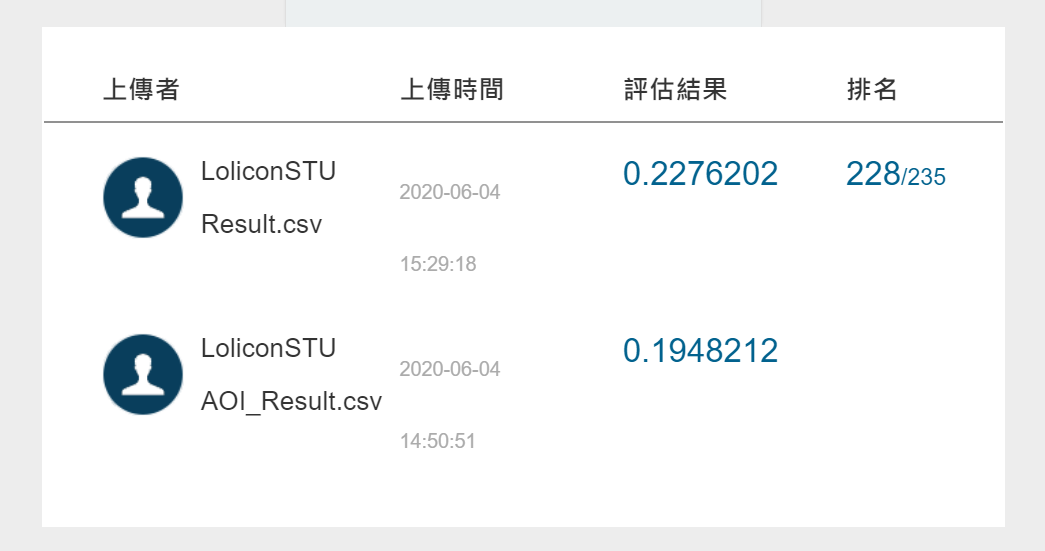

In [24]:
# 呵呵
load_img('/content/drive/My Drive/GG/AA.png')